In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set(style='whitegrid')

In [ ]:
def readcsv(filepath,filename):
  import os
  os.chdir(filepath)
  file = pd.read_excel(filename)

  return file

filepath = "/content/drive/MyDrive/IndiaStartup"
filename = "startup_funding.xlsx"

df = readcsv(filepath,filename)
print(df.head(3))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
print(pd.DataFrame(df.head(3)))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
#Inspect first few rows
print("First 5 rows:")
print(df.head())

#Basic info
print("\nDataset Info:")
print(df.info())

#Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
# Fill missing values
df['Industry_Vertical']  = df['Industry_Vertical'].fillna('others')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['CityLocation'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Undisclosed')


In [ ]:
# Convert date column to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
#Apply the function to the Amount column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())

In [ ]:
# Save cleaned data
df.to_csv("cleaned_startup_funding.csv",index=False)

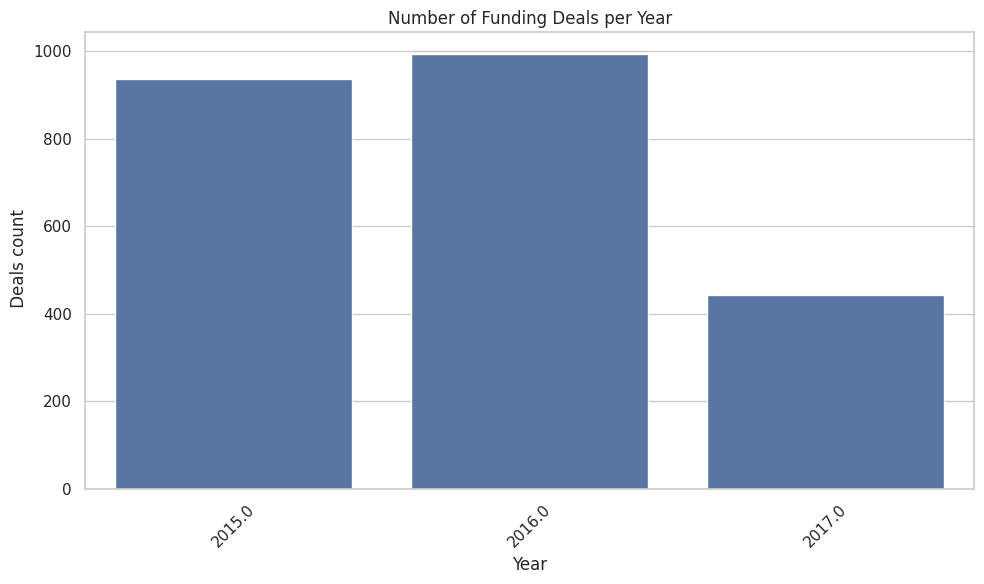

In [ ]:
#Number of deals per year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title('Number of Funding Deals per Year')
plt.xlabel("Year")
plt.ylabel(" Deals count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

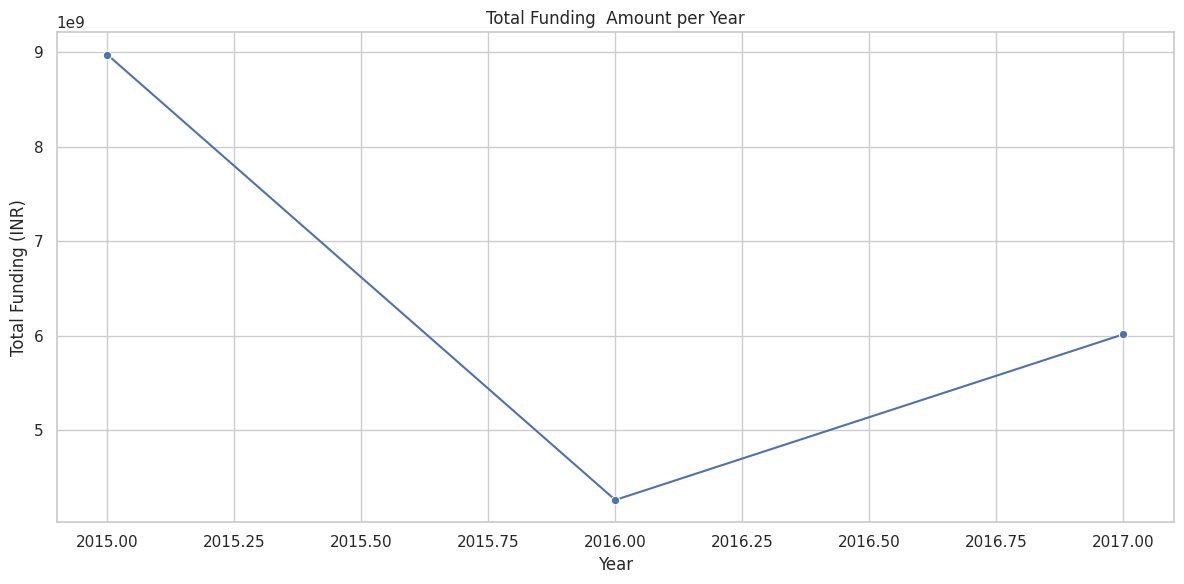

In [ ]:
#Total funding per year
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')
plt.title("Total Funding  Amount per Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

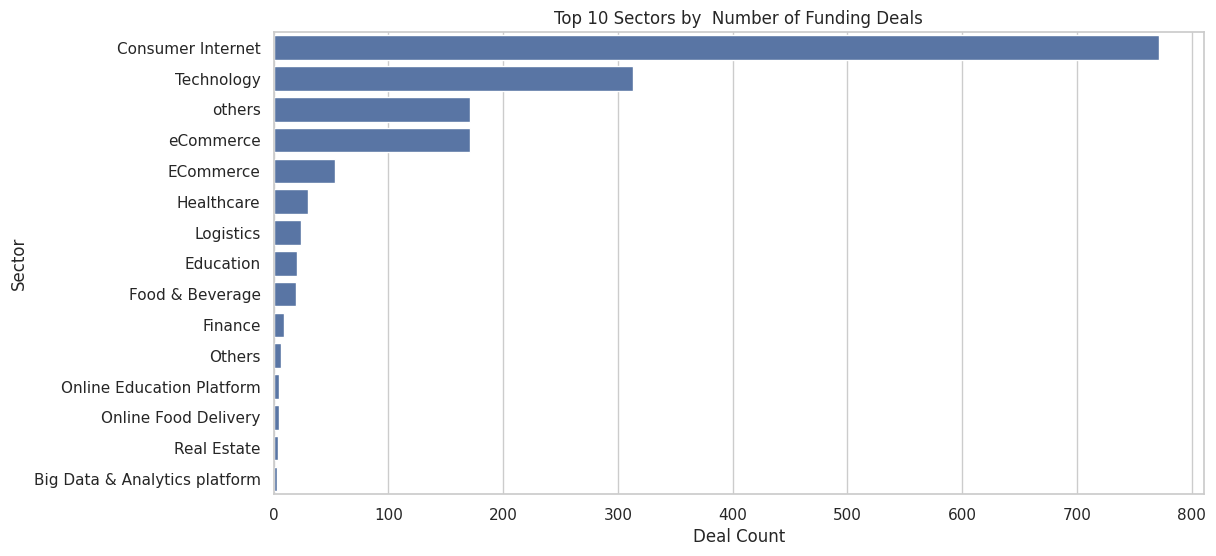

In [ ]:
#Top sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10 Sectors by  Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()

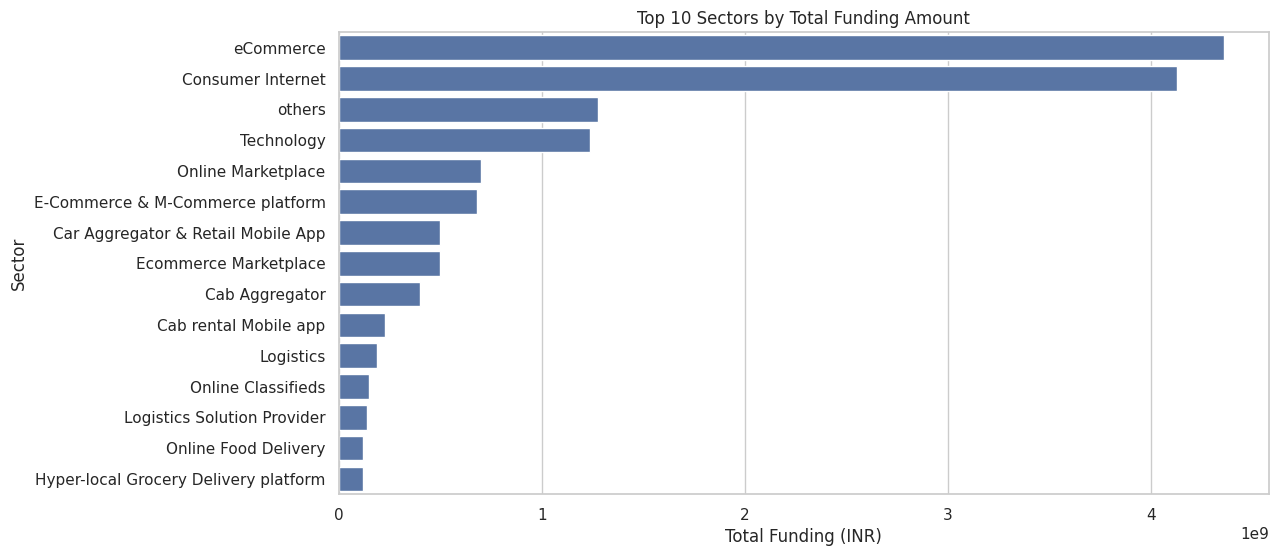

In [ ]:
#Top Sector by total funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace({'ECommerce': 'eCommerce'})
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title('Top 10 Sectors by Total Funding Amount')
plt.xlabel('Total Funding (INR)')
plt.ylabel('Sector')
plt.show()

In [ ]:
#Split multiple investor and count
investor_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.split(',')
investor_df = investor_df.explode('Investors_Name').dropna()
investor_df['Investors_Name'] = investor_df['Investors_Name'].str.strip().str.title()

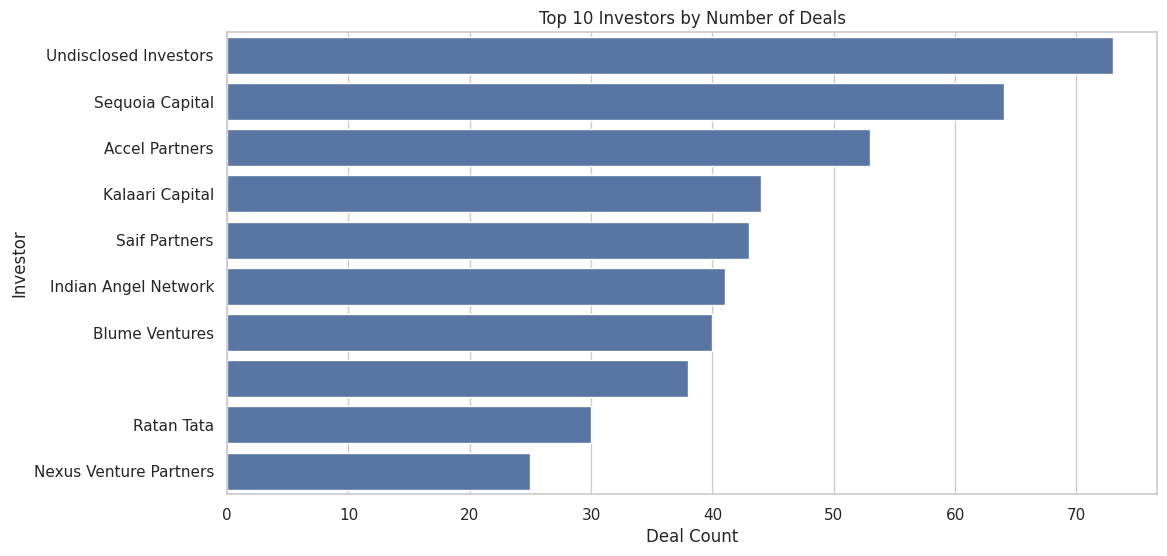

In [ ]:
#Top investor by number of deals
top_investor = investor_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_investor.values, y=top_investor.index)
plt.title('Top 10 Investors by Number of Deals')
plt.xlabel('Deal Count')
plt.ylabel('Investor')
plt.show()